In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"heart.csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [67]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [50]:
col = list(df.columns)

In [51]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

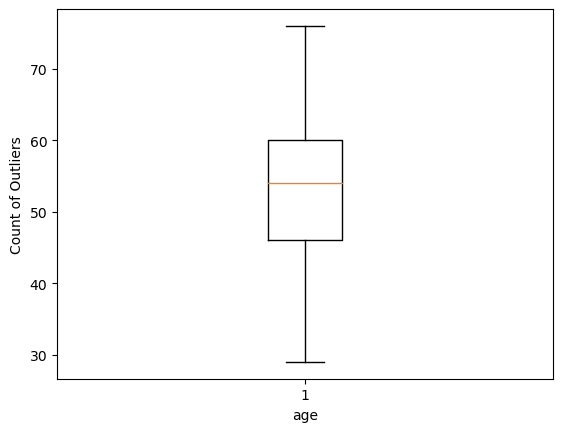

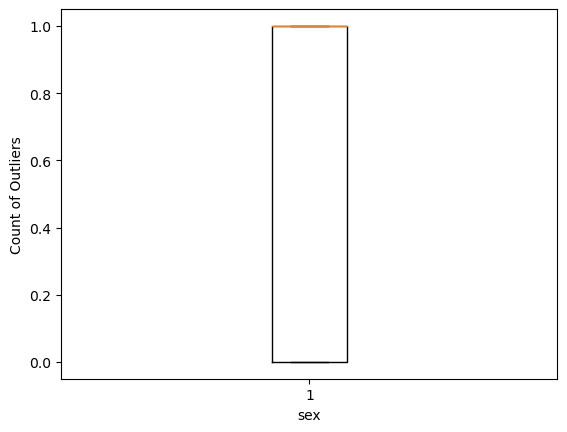

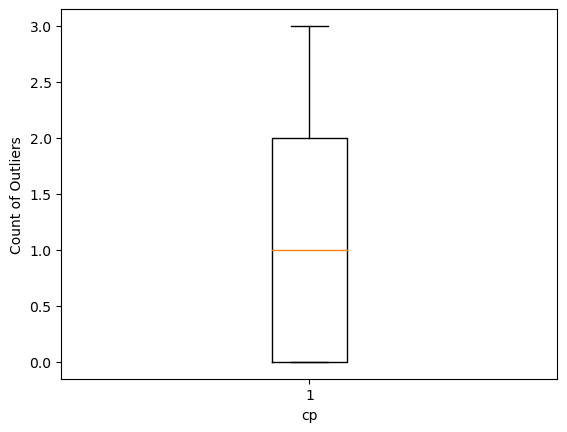

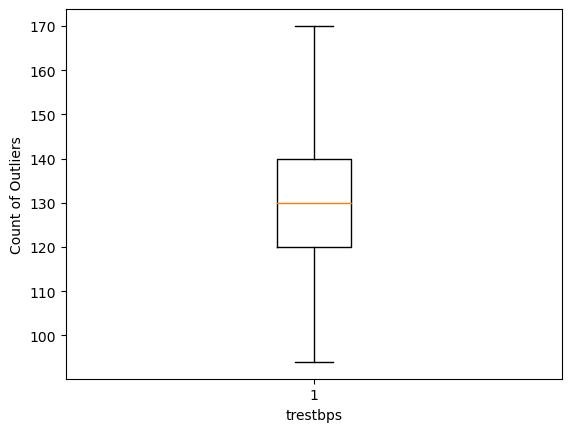

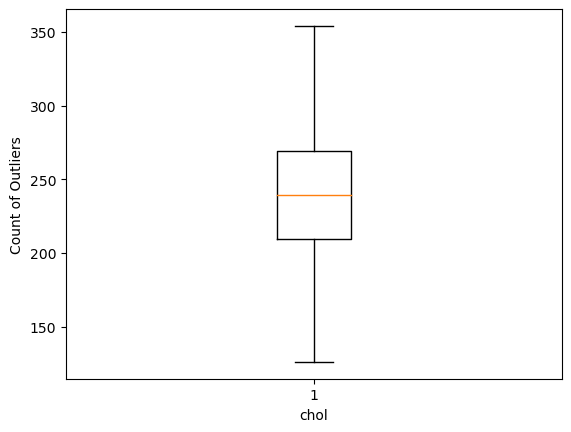

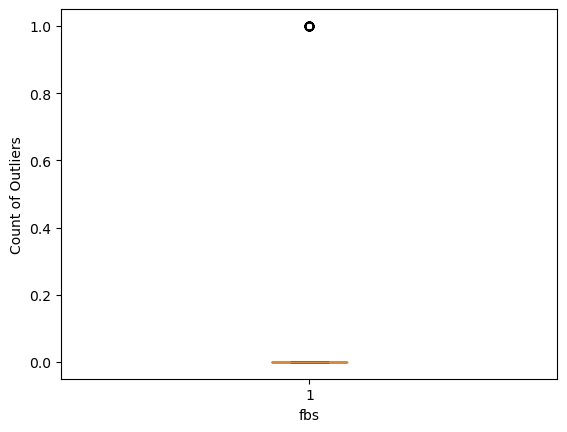

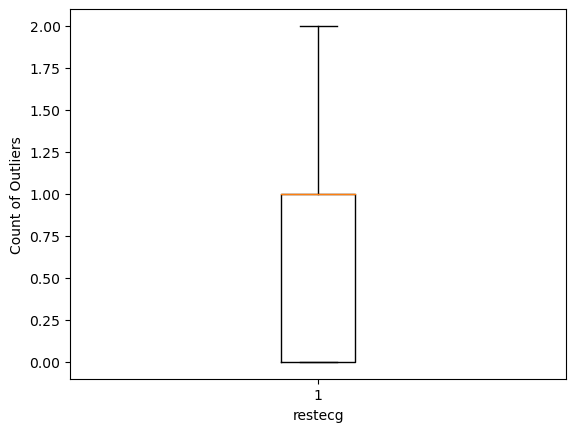

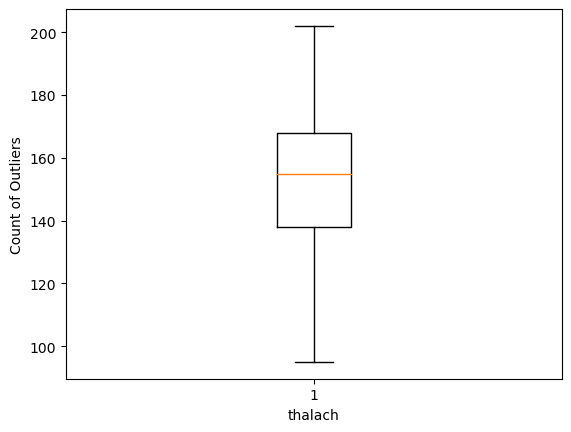

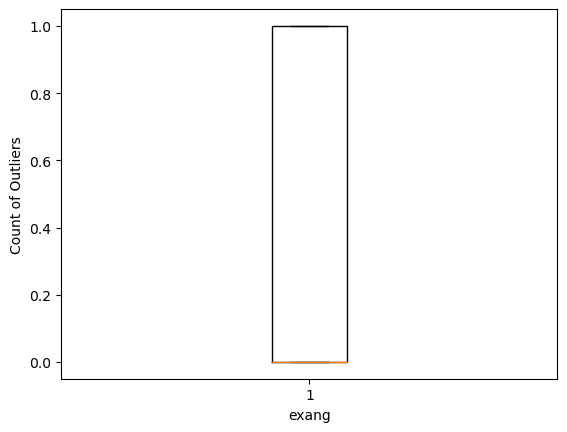

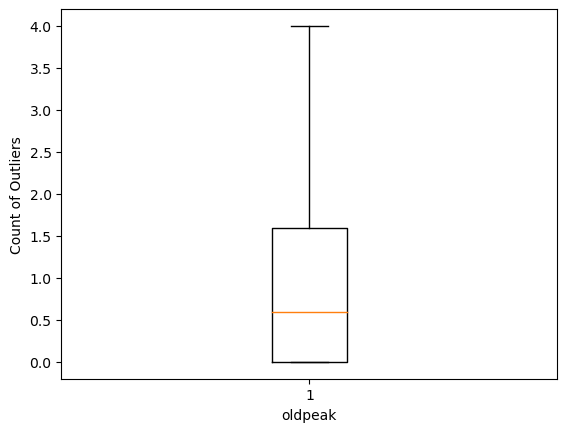

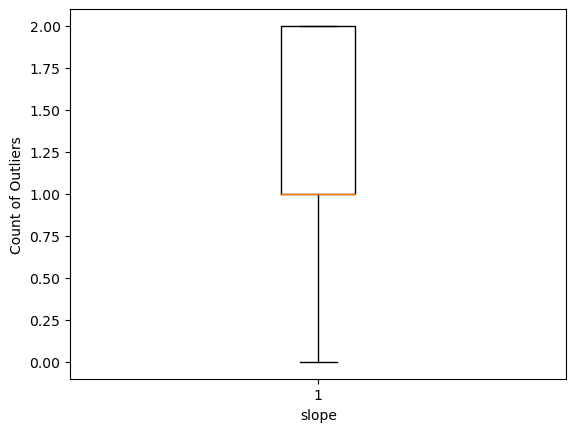

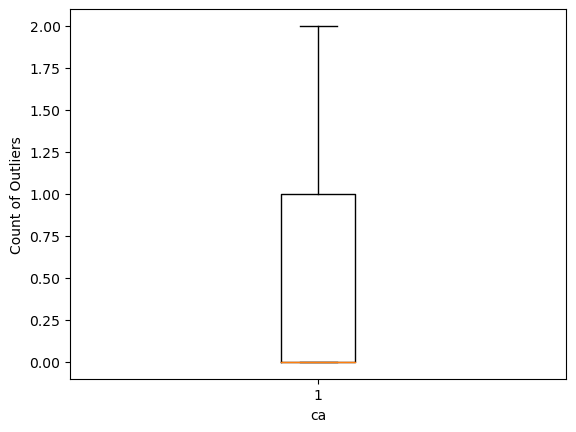

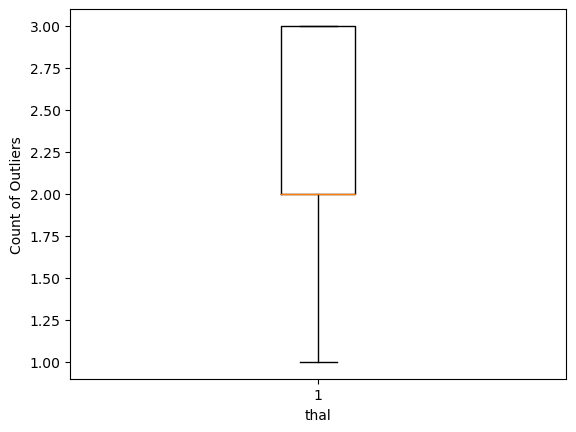

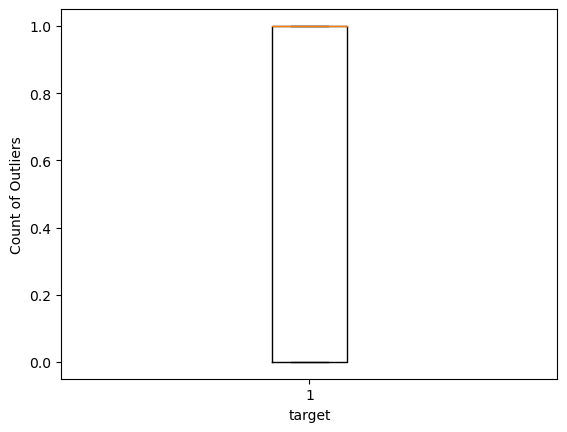

In [52]:
for col_name in col:
  if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
    plt.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('Count of Outliers')
    plt.show()

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
# IQR Method:

col_name=['trestbps','chol','oldpeak','ca']

Q1= df.trestbps.quantile(0.25)
Q3= df.trestbps.quantile(0.75)
IQR = Q3 - Q1
df=df[(df.trestbps >= Q1 - (1.5*IQR)) & (df.trestbps <= Q3 + (1.5*IQR))]

Q1= df.chol.quantile(0.25)
Q3= df.chol.quantile(0.75)
IQR = Q3 - Q1
df=df[(df.chol >= Q1 - (1.5*IQR)) & (df.chol <= Q3 + (1.5*IQR))]

Q1= df.oldpeak.quantile(0.25)
Q3= df.oldpeak.quantile(0.75)
IQR = Q3 - Q1
df=df[(df.oldpeak >= Q1 - (1.5*IQR)) & (df.oldpeak <= Q3 + (1.5*IQR))]

Q1= df['ca'].quantile(0.25)
Q3= df['ca'].quantile(0.75)
IQR = Q3 - Q1
df=df[(df['ca'] >= Q1 - (1.5*IQR)) & (df['ca'] <= Q3 + (1.5*IQR))]

In [55]:
col = list(df.columns)

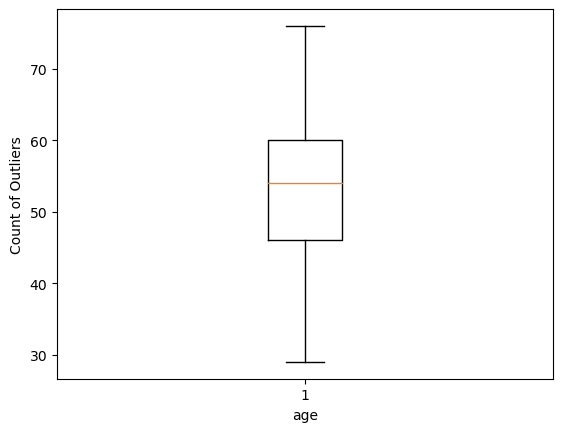

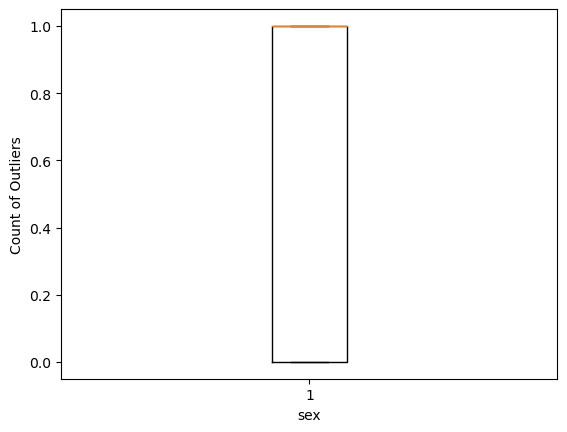

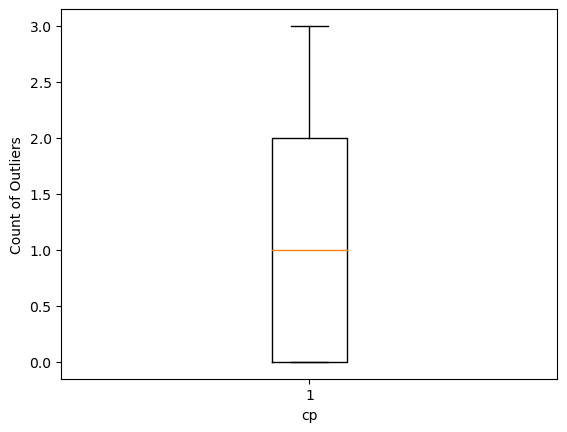

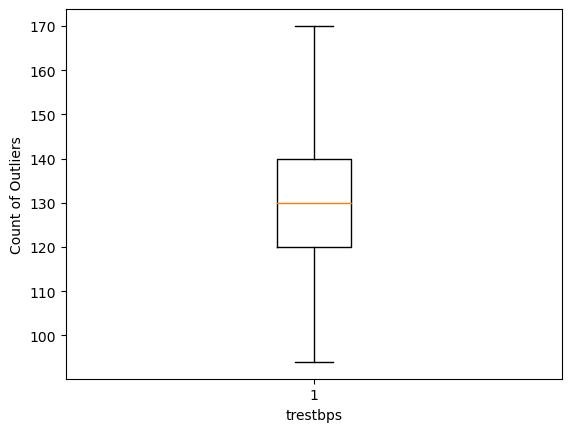

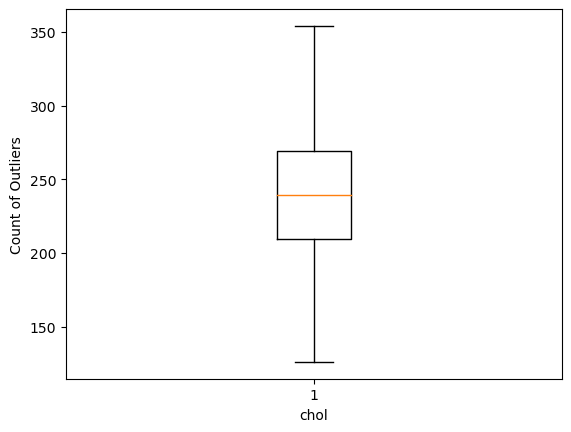

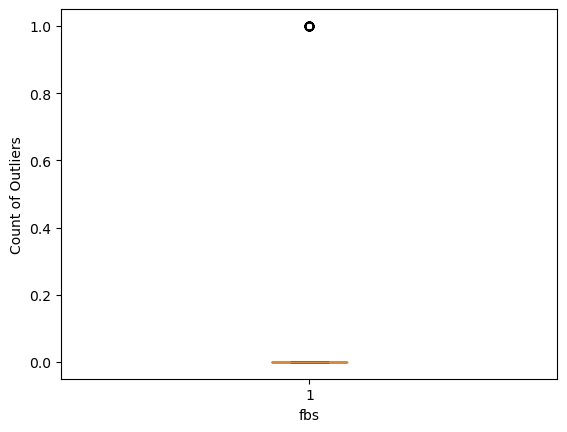

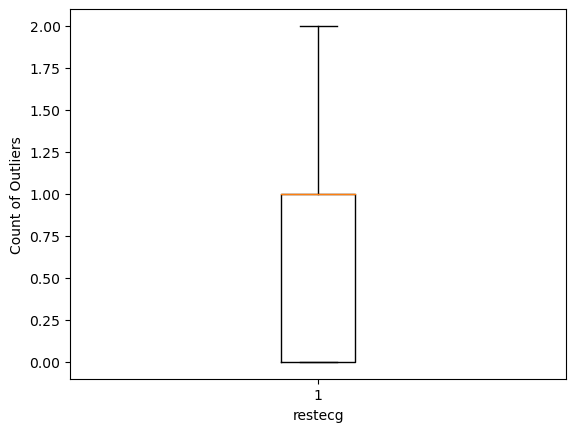

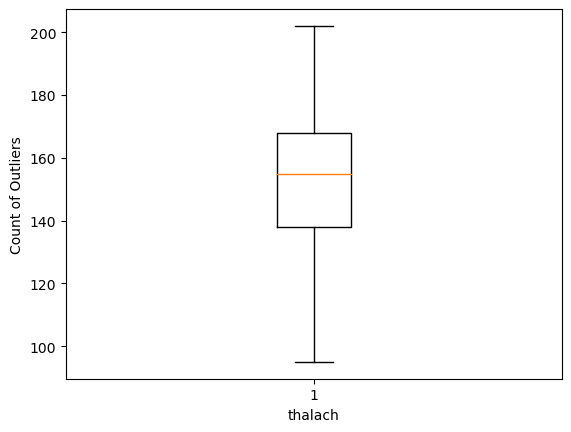

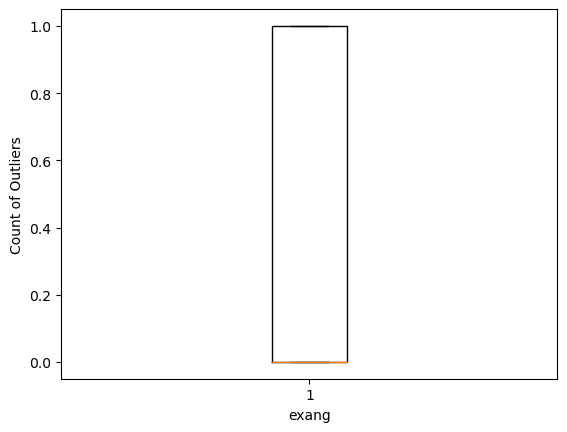

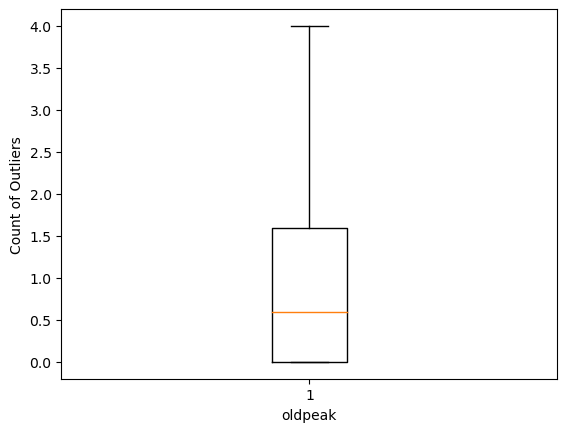

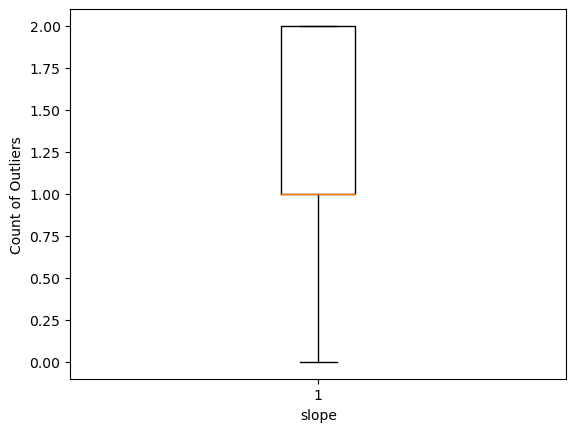

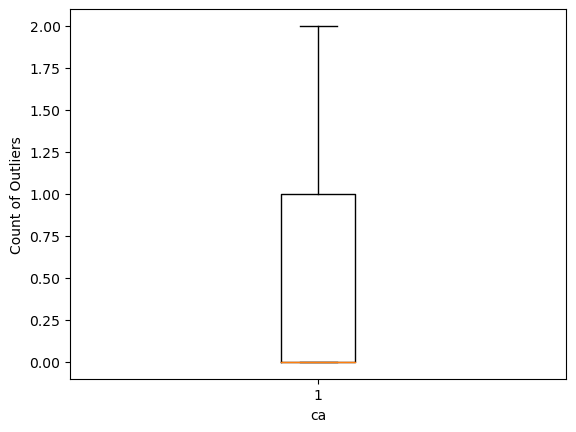

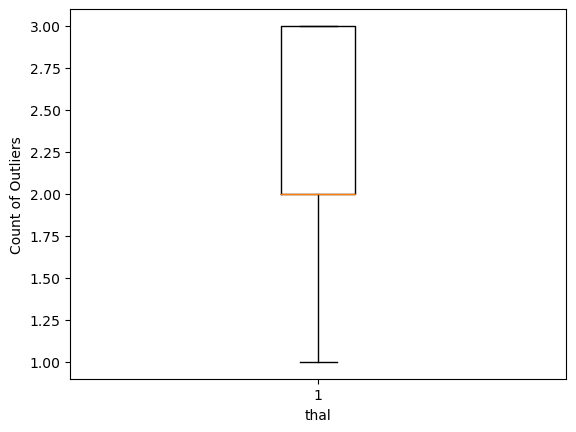

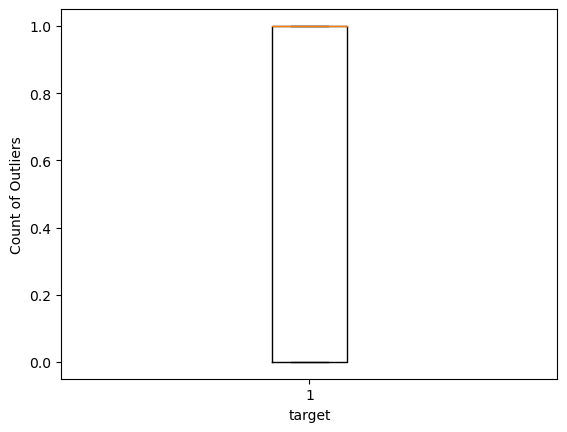

In [56]:
for col_name in col:
  if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
    plt.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('Count of Outliers')
    plt.show()

In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
x = df.iloc[:,:-1]

In [59]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [60]:
y = df['target']

In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 258, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=89)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
SC = StandardScaler()

In [66]:
x_train = SC.fit_transform(x_train)

In [67]:
x_test = SC.transform(x_test)

In [68]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.431463,0.663747,-0.917532,1.332779,0.090930,-0.336918,-0.991738,-1.017846,-0.694273,1.567603,-0.723476,-0.712311,1.235394
1,-0.751180,0.663747,1.011158,0.045613,0.322470,-0.336918,0.935601,1.249645,-0.694273,-0.908387,0.914283,-0.712311,-0.484141
2,-1.390615,0.663747,0.046813,0.367405,-0.835229,-0.336918,0.935601,-0.840003,-0.694273,-0.908387,-0.723476,-0.712311,-2.203676
3,0.314544,0.663747,1.011158,1.332779,-1.645618,-0.336918,0.935601,1.027342,-0.694273,0.615299,0.914283,-0.712311,-0.484141
4,-1.603759,-1.506599,1.011158,-2.271286,-0.927845,-0.336918,0.935601,1.249645,-0.694273,-0.908387,0.914283,-0.712311,-0.484141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.527689,0.663747,-0.917532,-1.241553,-0.001686,-0.336918,-0.991738,-0.395397,1.440357,0.234378,-0.723476,0.685175,1.235394
202,-1.177470,0.663747,-0.917532,-1.241553,-0.649997,-0.336918,0.935601,0.449354,-0.694273,-0.908387,0.914283,-0.712311,1.235394
203,-1.070897,0.663747,1.011158,0.689196,-0.094302,-0.336918,-0.991738,1.294106,-0.694273,-0.908387,0.914283,-0.712311,-0.484141
204,0.740833,0.663747,1.011158,1.332779,0.090930,2.968084,0.935601,-0.617700,1.440357,0.043917,-0.723476,-0.712311,-0.484141


In [69]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.314544,0.663747,0.046813,1.590213,-0.163764,-0.336918,-0.991738,0.582736,-0.694273,-0.908387,0.914283,0.685175,-0.484141
1,-0.111746,-1.506599,-0.917532,0.560480,-0.117456,-0.336918,-0.991738,0.404894,-0.694273,-0.908387,0.914283,-0.712311,-0.484141
2,-0.431463,-1.506599,0.046813,-0.597970,0.114084,-0.336918,0.935601,0.493815,-0.694273,0.139147,0.914283,-0.712311,-0.484141
3,0.847406,-1.506599,-0.917532,1.332779,0.114084,-0.336918,0.935601,0.138130,1.440357,0.424838,-0.723476,-0.712311,-0.484141
4,-0.538035,-1.506599,0.046813,0.303046,0.739241,-0.336918,0.935601,0.493815,-0.694273,-0.908387,-0.723476,-0.712311,-0.484141
5,-1.070897,-1.506599,1.011158,-0.726687,0.067776,-0.336918,0.935601,-0.084173,-0.694273,-0.622696,-0.723476,0.685175,-0.484141
6,-1.284042,0.663747,1.975503,1.204063,0.114084,-0.336918,-0.991738,1.205185,-0.694273,-0.146544,0.914283,2.082661,-0.484141
7,-0.218318,0.663747,1.975503,1.461496,1.364399,2.968084,0.935601,1.205185,-0.694273,0.234378,-0.723476,-0.712311,1.235394
8,0.101399,0.663747,-0.917532,0.174330,2.637867,-0.336918,0.935601,-0.840003,1.440357,0.234378,-0.723476,0.685175,1.235394
9,-1.390615,0.663747,1.011158,-1.112836,0.253008,-0.336918,0.935601,1.249645,-0.694273,-0.908387,0.914283,-0.712311,-0.484141


In [70]:
y_train

184    0
156    1
63     1
9      1
124    1
      ..
206    0
113    1
46     1
23     1
144    1
Name: target, Length: 206, dtype: int64

In [71]:
y_test

287    0
49     1
108    1
258    0
131    1
146    1
100    1
83     1
180    0
80     1
276    0
169    0
215    0
134    1
103    1
15     1
299    0
192    0
94     1
285    0
77     1
119    1
7      1
173    0
70     1
14     1
45     1
121    1
71     1
282    0
123    1
198    0
36     1
18     1
116    1
159    1
288    0
74     1
47     1
142    1
293    0
229    0
29     1
300    0
4      1
143    1
34     1
183    0
277    0
214    0
278    0
68     1
Name: target, dtype: int64

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dcsn = DecisionTreeClassifier()

In [74]:
dcsn.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
dcsn_pred =dcsn.predict(x_test)

In [76]:
y_test

287    0
49     1
108    1
258    0
131    1
146    1
100    1
83     1
180    0
80     1
276    0
169    0
215    0
134    1
103    1
15     1
299    0
192    0
94     1
285    0
77     1
119    1
7      1
173    0
70     1
14     1
45     1
121    1
71     1
282    0
123    1
198    0
36     1
18     1
116    1
159    1
288    0
74     1
47     1
142    1
293    0
229    0
29     1
300    0
4      1
143    1
34     1
183    0
277    0
214    0
278    0
68     1
Name: target, dtype: int64

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

In [78]:
acc = accuracy_score(dcsn_pred,y_test)

In [79]:
acc

0.6730769230769231

In [45]:
# HW Fetch the columns with outliers and remove it and then build the same model built in this hands on
# Check the differenece in accuracy between the model built in the session and the model built after outliers removal
# Also create the confusion Matrix

In [81]:
cm=confusion_matrix(y_test,dcsn_pred)
cm

array([[ 9, 11],
       [ 6, 26]], dtype=int64)

<AxesSubplot:>

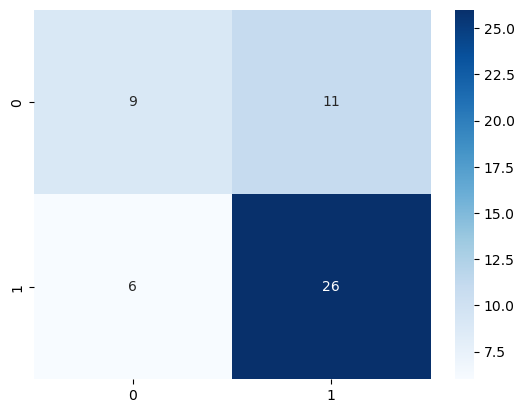

In [83]:
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")